In [4]:
# Step 1: Import Libraries
# ---------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load dataset
file_path = r"D:\codex techno project\1st--Exploratory Data Analysis (EDA) on Retail Sales Data\Data\Retail Sales Dataset\retail_sales_dataset.csv"
df = pd.read_csv(file_path)

# Display shape and info
print("Shape:", df.shape)
df.info()
df.head()


Shape: (1000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [13]:
df = pd.read_csv(r"D:\codex techno project\1st--Exploratory Data Analysis (EDA) on Retail Sales Data\Data\Retail Sales Dataset\retail_sales_dataset.csv")


In [10]:
# Clean column names
df.columns = df.columns.str.strip()
# Check and handle null values
print(df.isnull().sum())
df.dropna(inplace=True)

# Check duplicates
print("Duplicate rows:", df.duplicated().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
Duplicate rows: 0


In [11]:
# Basic Statistics
df.describe()

# Median and Mode
print("Mean:\n",df.mean(numeric_only=True))
print("Median:\n", df.median(numeric_only=True))
print("Mode:\n", df.mode(numeric_only=True).iloc[0])
print("Standard Deviation:\n", df.std(numeric_only=True))  


Mean:
 Transaction ID    500.500
Age                41.392
Quantity            2.514
Price per Unit    179.890
Total Amount      456.000
dtype: float64
Median:
 Transaction ID    500.5
Age                42.0
Quantity            3.0
Price per Unit     50.0
Total Amount      135.0
dtype: float64
Mode:
 Transaction ID     1.0
Age               43.0
Quantity           4.0
Price per Unit    50.0
Total Amount      50.0
Name: 0, dtype: float64
Standard Deviation:
 Transaction ID    288.819436
Age                13.681430
Quantity            1.132734
Price per Unit    189.681356
Total Amount      559.997632
dtype: float64


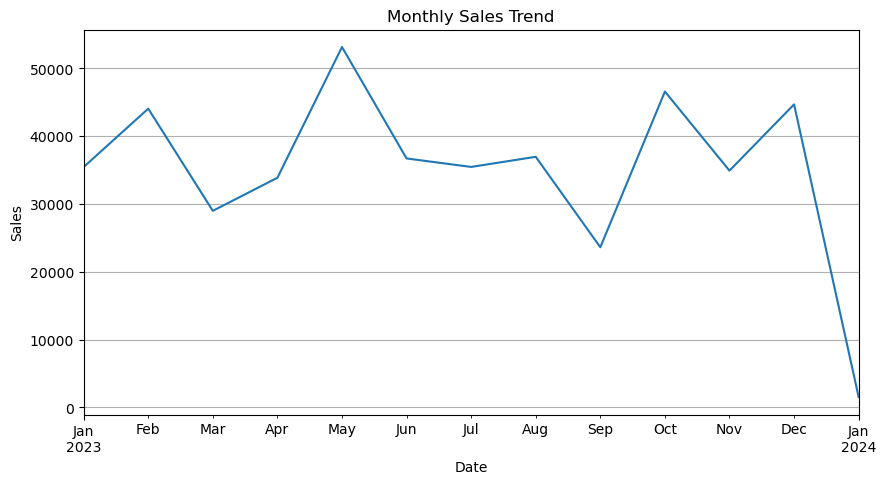

In [35]:
# ------Exploratory Data Analysis------------

#---- Sales Trends Over Time (Time Series)
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime
df.set_index('Date')['Total Amount'].resample('ME').sum().plot(figsize=(10,5), title='Monthly Sales Trend')
plt.ylabel("Sales")
plt.xlabel("Date")
plt.grid(True)
plt.show()


##  Insight: Monthly Sales Trend Analysis

### 1. Identify Overall Trend
- **Observation**: The chart shows fluctuations throughout the year rather than a steady increase or decrease.
- **Insight**: There is no consistent upward or downward trend. Sales are seasonal or volatile, with noticeable peaks and troughs.

### 2. Highlight High and Low Points
- **Highest Sales**: May 2023 (over 50,000)
- **Lowest Sales**: January 2024 (close to 0)
- **Insight**:
  - May had the best performance. Investigate what campaigns, promotions, or market conditions drove this.
  - The sharp drop in January 2024 could indicate missing data, year-end issues, or operational shutdown.

### 3. Seasonal Patterns or Anomalies
- **Peaks**: May, October, December
- **Dips**: March, September, January
- **Insight**: Business might have strong Q2 and Q4 performance, possibly due to seasonal demand. Low sales in March and September may indicate off-season or inefficiencies.

### 4. Month-over-Month Changes
- **Sharp Rises**: April → May, September → October
- **Sharp Drops**: May → June, December → January
- **Insight**: Sudden increases and drops might need further analysis (e.g., changes in strategy, pricing, or new product launches).


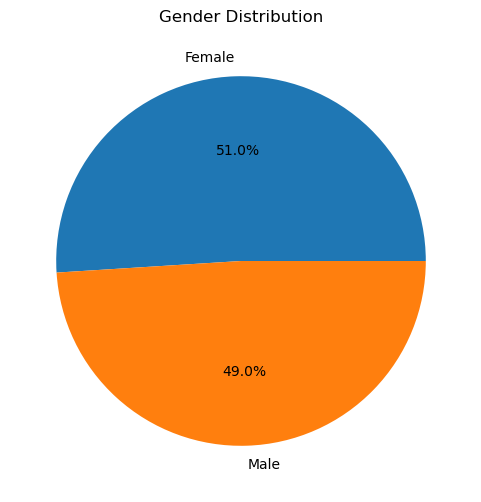

In [7]:
# Gender Distribution
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Gender Distribution', figsize=(6,6))
plt.ylabel('')
plt.show()



### Gender Distribution Insight
**Female** 51%

**Male** = 49%

The gender distribution is nearly balanced, with a slight majority of female customers.
This suggests that marketing strategies, product offerings, and user experiences should be designed to appeal equally to both genders, maintaining inclusivity and balance in customer engagement.



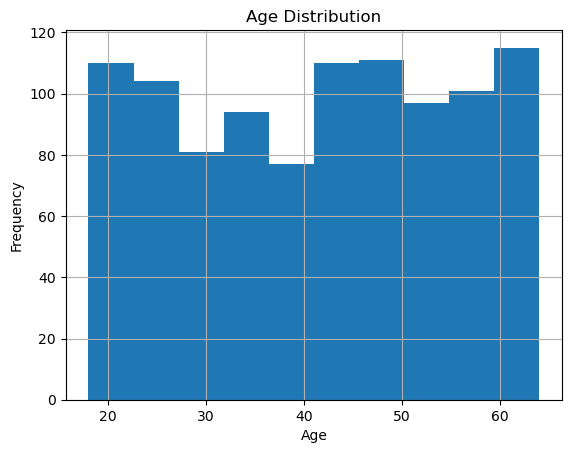

In [8]:
# Age Distribution
df['Age'].hist(bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Insight from Age Distribution Chart
**Age Range: ~18 to ~65**

### Most Common Age Groups:

**Ages around 18–20, 45–50, and 60–65 have the highest frequency (above 110).**

### Less Represented Age Groups:

**Ages 30–40 show a noticeable dip, especially around age 38.**

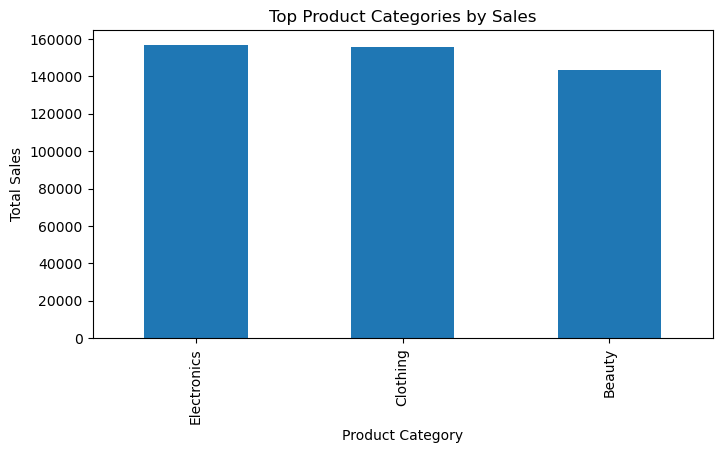

In [9]:
df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).plot(kind='bar', title='Top Product Categories by Sales', figsize=(8,4))
plt.ylabel('Total Sales')
plt.show()

### Top Product Categories by Sales – Insights

The top three product categories by total sales are:

1. **Electronics** – ~155,000
2. **Clothing** – ~153,000
3. **Beauty** – ~145,000

**Electronics and Clothing** are almost equal in sales, reflecting strong market interest in both technology and apparel. The **Beauty** category also shows significant sales, indicating a broad appeal.

To maximize revenue, focus can be placed on:
- Strengthening marketing for top two categories.
- Exploring growth strategies for Beauty products.
- Creating bundled offers or seasonal campaigns involving all three.


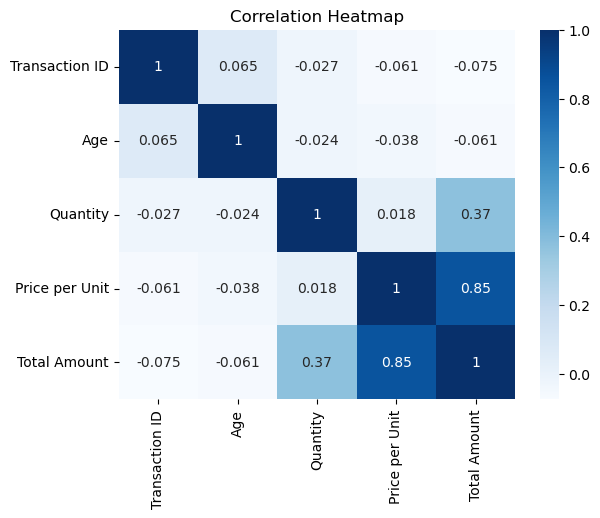

In [37]:
# Correlation Matrix
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()


### Correlation Analysis – Key Insights

- **Total Amount** is **strongly correlated with Price per Unit (0.85)** and **moderately with Quantity (0.37)**.
  - This means pricing strategy has the highest influence on revenue.
  - Quantity affects revenue too, but to a lesser extent.

- **Age** has very weak correlation with sales-related variables.
  - No actionable insights based on age in this dataset.

- **Transaction ID** is just a unique identifier and doesn't correlate meaningfully with other metrics.

**Recommendation**:
Focus on optimizing **price per unit** and encouraging larger quantities for increased revenue.
